In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("aircrahesFullDataUpdated_2024.csv")

In [3]:
df.sample()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
3842,2008,Qtr 4,November,27,France,Airbus,Airbus A320 232D,Off Perpignan France,Zealand New Air from leased Airways XL,0,7,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [5]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace\
(r"[^A-Za-z0-9_]", "")


In [7]:
df["Country/Region"] = df["Country/Region"].fillna("Unspecified")
df["Operator"] = df["Operator"].fillna("Unspecified")


In [8]:
# Dictionary of corrections
country_corrections = {
    # "Usa": "USA",
    # "United States": "USA",
    # "Uk": "United Kingdom",
    # "Ussr": "Russia",
    # "Unknown": "Unknown",   
   #  "Can": "Canada",
    ######################
    ' Alaska':'Alaska',
    'Belgian':'Belgium',
    'Brazil/tAmazonaves':'Brazil',
    'British':'Britain',
    'Cameroons':'Cameroon',
    
    'China?':'China',
    'Democratic':'DRC',
    'Equatorial':'Equitorial Guinea',
    'French':'France',
    'Hong':'Hong Kong',
    'India\tPawan':'India',
    'near':'California',
    'New':'New York',
    'North':'North Korea',
    'Northern':'Northern Ireland',
    'Norway\tCHC':'Norway',
    'ON':'Ontario Canada',
    'Papua':'Papua New Guinea',
    'Puerto':'Puerto Rico',
    'Saudi':'Saudi Arabia',
    'SK':'Canada',
    'South-West':'South Africa',
    'Sri':'Sri Lanka',
    'Tennesee':'Tennessee',
    'USSRAeroflot':'Russia',
    '100':'Unknown',
    'BC':'British Columbia Canada',
    'Bias':'China',
    'Brazil\tLoide':'Brazil',
    'miles':'Miles',
    'Spain\r\n\t\r\nMoron':'Spain',
    'United':'UAE',
    'Airlines':'Unknown',
    'Coloado':'Colorado',
    'D.C.Capital':'Washington DC',
    'Florida?':'Florida',
    'off':'Angola',
    'The':'Netherlands',
    'Argentinade':'Argentina',
    'California?':'California',
    'D.C.Air':'Florida',
    'El':'El Salvador',
    'Indonesia\r\n\t\r\nSarmi':'Indonesia',
    'NSW':'Australia',
    'UARMisrair':'EgyptAir (UAR era)',
    'Minnesota46826/109':'Minnesota',
    'Qld':'Australia',
    'U.S.':'United States',
    '325':'Unspecified',
    '110':'Unspecified',
    '116':'Unspecified',
    '18':'Unspecified',
    '570':'Unspecified',
    'Germany?':'Germany',
    'Azerbaijan\r\n\t\r\nBakou':'Azerbaijan',
    'USSRBalkan':'Balkan Bulgarian Airlines (USSR era)',
    'Brazil\r\nFlorianopolis':'Brazil',
    'Chile\tAerolineas':'Chile',
    'Honduras?':'Honduras',
    'US':'United States',
    'Afghanstan':'Afghanistan',
    'USSRMilitary':'USSR Military Aviation',
    '800':'Unknown',
    'Tajikistan\tMilitary':'Tajikistan',
    'USSRAerflot':'Russia',
    'Djibouti\r\n\tDjibouti':'Dijibouti',
    'France?':'France',
    'UAEGulf':'UAE',
    'Virginia.American':'Virginia America',
     "'-":'Unspecified',
    '10':'Unspecified',
    'Unkown':'Unspecified'

}


df["Country/Region"] = df["Country/Region"].replace(country_corrections)


In [9]:
df['Country/Region'].unique()

array(['Unspecified', 'Alaska', 'Afghanistan', 'Aichi', 'Algeria',
       'Angola', 'Argentina', 'Australia', 'Azerbaijan', 'Bahamas',
       'Bali', 'Belgium', 'Black', 'Bolivia', 'Botswana', 'Brazil',
       'Brazil\tAmazonaves', 'Britain', 'Calabria', 'California',
       'Cameroon', 'Canada', 'Canary', 'Channel', 'Chechnya', 'Chile',
       'China', 'Colombia', 'Colorado', 'Congo', 'Croatia', 'Cyprus',
       'DRC', 'East', 'Ecuador', 'England', 'Equitorial Guinea',
       'Estonia', 'Ethiopia', 'Finland', 'Florida', 'France', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi',
       'Guatemala', 'Guyana', 'Hawaii', 'Honduras', 'Hong Kong', 'Idaho',
       'India', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq', 'Ireland',
       'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas', 'Kenya',
       'Laos', 'Libya', 'London', 'Madagascar', 'Malta', 'Mexico',
       'Michigan', 'Moldova', 'Mongolia', 'Morocco', 'Netherlands',
       'Nevada', 'New Yo

In [10]:
# Dictionary of corrections for Aircraft manufacturers
manufacturer_corrections = {
    "Doublas": "Douglas",
    "MD Douglas": "McDonnell Douglas",
    "Mc Donnell Douglas": "McDonnell Douglas",
    "De Havilland": "de Havilland",
    "de Havilland  Canada": "De Havilland Canada",
    "Hadley Page 137Jetstream I": "Handley Page Jetstream",
    "Lisnov": "Lisunov",
    "C": "Cessna",
    "Fokke": "Focke-Wulf",
    "B17G Flying": "Boeing B-17G Flying Fortress",
    "Lockheed 14 Super": "Lockheed 14 Super Electra",
    "Lockheed 188C": "Lockheed L-188C Electra",
    "Aerospatiale Caravelle": "Aérospatiale Caravelle",
    "OFM": "OFM Aircraft",
    "??": "Unknown",
    "Swallow?": "Swallow",
    "Embraer 110EJ Band./Embraer 110P": "Embraer 110 Bandeirante",
    "Embraer 110P1": "Embraer 110 Bandeirante",
    "Pilatus Britten Norman": "Pilatus Britten-Norman",
    "NAMC": "Nihon Aircraft Manufacturing Corporation",
    "Britten Norman": "Britten-Norman",
    "Lockheed Super": "Lockheed Super Constellation",
    "Lockheed 14": "Lockheed Model 14",
    "Lockheed 18": "Lockheed Model 18 Lodestar",
    "Lockheed Hudson": "Lockheed Hudson",
    "Vickers 610 Viking": "Vickers Viking 610",
    "Vickers Viking 1B & Soviet": "Vickers Viking 1B",
    "Vickers Valetta": "Vickers Valetta",
    "Vickers Viscount": "Vickers Viscount",
    "Vickers Wellington": "Vickers Wellington",
    "Vickers Vanguard": "Vickers Vanguard",
    "Avro 685 York": "Avro 685 York",
    "Avro Shackleton": "Avro Shackleton",
    "Handley Page": "Handley Page",
    "Hawker Siddeley HS": "Hawker Siddeley",
    "Hawker Siddeley Trident": "Hawker Siddeley Trident",
    "British Aerospace BAe": "British Aerospace",
    "British Aerospace BAe": "British Aerospace",
    "Cams": "CAMS",
    "Hadley Page": "Handley Page",
    "Messerschmidt": "Messerschmitt",
    "Pilgrim": "Fairchild Pilgrim",
    "Aerocomp Comp Air": "Aerocomp Comp Air",
    "Eurocopter EC225LP Super Puma M2+": "Eurocopter EC225LP Super Puma",
    "Bell 212FAC": "Bell 212",
    "Bell 205": "Bell 205",
    "Bell": "Bell",
    "Stearman": "Stearman Aircraft",
    "Stinson Model": "Stinson",
    "Farman": "Farman Aviation Works",
    'Swallow\r\nSwallow?':'Swallow',
    'Sikorsky S43 (flying':'Sikorsky S43 (flying)',
    'Unknown /':'Unknown',
    'Short Sandringham (flying':'Short Sandringham (flying)',
    'Avro 691 Lancastrian (flying':'Avro 691 Lancastrian (flying)',
    'Short Sandringham 5 (flying':'Short Sandringham 5 (flying)',
    'Latécoère 23 (flying':'Latécoère 23 (flying)',
    'Latécoère 300 (float':'Latécoère 300 (float)',
    'Latecoere 301 (flying':'Latecoere 301 (flying)',
    'Helicopter?':'Helicopter',
    'Short Sandringham 2 (flying':'Short Sandringham 2 (flying)',
    'CMASA Wal (flying':'CMASA Wal (flying)',
    'Fairchild packet (C119 flying':'Fairchild packet (C119 flying)',
    'Domier Delphin III (flying':'Domier Delphin III (flying)',
    'Airship?':'Airship',
    'Latecoere 631 (sea':'Latecoere 631 (sea)',
    'Aeromarine Model 85 (flying':'Aeromarine Model 85 (flying)',
    'Vickers Viscount 745D /':'Vickers Viscount 745D',
    'Stinson?':'Stinson',
    '?42':'42',
    '?VP':'VP',
    'Short Calcutta (flying':'Short Calcutta (flying)',
    'Rutan Long EZ (experimental':'Rutan Long EZ (experimental)',
    'Hawker Siddeley Trident 2E /':'Hawker Siddeley Trident 2E'

}


df["Aircraft_Manufacturer"] = df["Aircraft_Manufacturer"].replace(manufacturer_corrections)

In [11]:
df["Aircraft_Manufacturer"] = df["Aircraft_Manufacturer"].replace("?", " ")

In [12]:
df['Aircraft_Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas',
       'Fairchild Pilgrim', 'Ilyushin', 'Cessna  208B Grand',
       'Hawker Siddeley', 'HS', 'Avro', 'Lockheed Model 14',
       'Swearingen SA227AC Metroliner', 'Yakovlev', 'Curtiss', 'Mil',
       'Convair', 'Consolidated', 'Embraer 110 Bandeirante', 'Learjet',
       'Nihon Aircraft Manufacturing Corporation', 'Embraer/Piper',
       'Lockheed Model 18 Lodestar', 'CAMS', 'Ford', 'Grumman',
       'Lockheed', 'de Havilland', 'Mi', 'Pilatus', 'Sikorsky', 'Unknown',
       'Aérospatiale', 'Bell 212',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers Viking 610', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman Aviat

In [13]:
# Dictionary of corrections for Aircraft
aircraft_corrections = {
        "Douglas DC 4?": "Douglas DC-4",
    "Doublas Dc 3?": "Douglas DC-3",
    "Antonov AN 26?": "Antonov An-26",
    "Antonov AN 32?": "Antonov An-32",
    "Mi  8 helicopter?": "Mil Mi-8",
    "Mi  8?": "Mil Mi-8",
    "Mil Mi 8?": "Mil Mi-8",
    "Curtiss seaplane?": "Curtiss Seaplane",
    "Zeppelin L 59 (airship)?": "Zeppelin LZ 59",
    "Curtiss C 46 Commando?": "Curtiss C-46 Commando",
    "??": "Unknown",
    "?VH  TAT": "Unknown",
    "\"Swallow\nSwallow?\"": "Swallow",
    "Zeppelin L 70 (airship)?": "Zeppelin L 70 (airship)",
    "UH  60 Blackhawk helilcopter?": "UH-60 Black Hawk helicopter",
    "Caproni Ca.48?": "Caproni Ca.48",
    "Unknown / Unknown?": "Unknown",
    "Antonov AN 22?": "Antonov AN 22",
    "Siebel Si 204?": "Siebel Si 204",
    "Zeppelin L 23 (airship)?": "Zeppelin L 23 (airship)",
    "Lockheed 18 56 Lodestar?": "Lockheed 18-56 Lodestar",
    "Consolidated B 24?": "Consolidated B-24",
    "Mc Donnell Dougals DC 9?": "McDonnell Douglas DC-9",
    "Fokker Universal F 14?": "Fokker Universal F-14",
    "Douglas C47?": "Douglas C-47",
    "Dirigible Roma (airship)?": "Dirigible Roma (Airship)",
    "Mil Mi 17?": "Mil Mi-17",
    "Helicopter?": "Helicopter (Unspecified)",
    "Douglas DC 3?": "Douglas DC-3",
    "Curtiss C 46?": "Curtiss C-46",
    "Lisunov Li 2?": "Lisunov Li-2",
    "Black Hawk helicopter?": "Sikorsky UH-60 Black Hawk",
    "Mil Mi 8 (helicopter)?": "Mil Mi-8 Helicopter",
    "Mil Mi 8 / Mil Mi": "Mil Mi-8",
    "Douglas C 47?": "Douglas C-47",
    "Fairchild packet (C119 flying boxcar)?": "Fairchild C-119 Flying Boxcar",
    "Farman F 40?": "Farman F.40",
    "Tupolev ANT 9?": "Tupolev ANT-9",
    "Mi  17?": "Mil Mi-17",
    "Boeing RC 135E?": "Boeing RC-135E",
    "Douglas DC 5?": "Douglas DC-5",
    "PBY Catalina?": "Consolidated PBY Catalina",
    "KJ  2000?": "KJ-2000",
    "FD Type Dirigible?": "Dirigible (Type FD)",
    "Pitcairn PA 6 Mailwing?": "Pitcairn PA-6 Mailwing",
    "LVG C VI?": "LVG C.VI",
    "Sukhoi Su 2742": "Sukhoi Su-27 (42)",
    "Loening C W Air Yaht?": "Loening CW Air Yacht",
    "?NC21V": "NC21V",
    "Mil Mi 8T (helicopter)?": "Mil Mi-8T helicopter",
    "Douglas DC 3 (C": "Douglas DC-3",
    "Douglas DC C": "Douglas DC-3",
    "Five Grumman TBM Avengers?": "Grumman TBM Avenger (5 units)",
    "Antonov AN 12?": "Antonov An-12",
    "Fairchild Pilgrim 100A?": "Fairchild Pilgrim 100A",
    "KB  50?": "Boeing KB-50",
    "Boeing Vertol CH 47 (helicopter)?": "Boeing Vertol CH-47 Chinook",
    "Boeing Vertol CH 47 (helilcopter)?": "Boeing Vertol CH-47 Chinook",
    "Fairchild C 123?": "Fairchild C-123 Provider",
    "Fairchild?": "Fairchild (unspecified model)",
    "Twin Apache?": "Curtiss-Wright XP-60 'Twin Apache'",
    "Ilyushin II 14?": "Ilyushin Il-14",
    "Lockheed 18 08 Lodestar	N410M": "Lockheed 18-08 Lodestar N410M",
    "Lockheed 049 ConsellationNC86505": "Lockheed 049 Constellation NC86505",
    "MI 172 V5 helicopter?": "Mil Mi-172 (helicopter)",
    "Zeppelin L 43 (airship)?": "Zeppelin LZ-43 (airship)",
    "L  Hudson?": "Lockheed Hudson",
    "Fairchild C 199G?": "Fairchild C-119G",
    "Pitcairns PA 6?": "Pitcairn PA-6",
    "Aeromarine Model 85 (flying boat)?": "Aeromarine Model 85 (flying boat)",
    "McDonnel F 4E Phantom II?": "McDonnell F-4E Phantom II",
    "Sepecat Jaguar A?": "SEPECAT Jaguar A",
    "Junkers JU 86?": "Junkers Ju-86",
    "?139": "Unknown",
    "Airship?": "Airship",
    "C  46?": "Curtiss C-46",
    "H  21B?": "Piasecki H-21B",
    "MiG  23?": "Mikoyan-Gurevich MiG-23",
    "MiG  15 UTI?": "Mikoyan-Gurevich MiG-15 UTI",
    "Douglas C 54 Skymaster?": "Douglas C-54 Skymaster",
    "Douglas C 54?": "Douglas C-54",
    "Stinson?": "Stinson",
    "Zeppelin L 22 (airship)?": "Zeppelin L-22 (airship)",
    "Super Zeppelin (airship)?": "Zeppelin (Super airship)",
    "Zeppelin L 34 (airship)?": "Zeppelin L-34 (airship)",
    "Ilyushin IL 18?": "Ilyushin Il-18",
    "Kalinin K 7?": "Kalinin K-7",
    "Boeing Vertol CH47A (helicopter)?": "Boeing Vertol CH-47A (helicopter)",
    "?42  52196": "Douglas C-42 52196",
    "Budd RB 1 Conestoga?": "Budd RB-1 Conestoga",
    "Li  2 / Li": "Lisunov Li-2",
    "Lockheed Hudson?": "Lockheed Hudson",
    "Tempest?": "Hawker Tempest",
    "Ford Tri motor 5?": "Ford Trimotor 5",
    "Douglas A 3D Skywarrior?": "Douglas A-3D Skywarrior",
    "De Havilland DH 4?": "de Havilland DH-4",
    "Zeppelin L 31 (airship)?": "Zeppelin L-31 (Airship)"
}


df["Aircraft"] = df["Aircraft"].replace(aircraft_corrections)

In [14]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ...,
       'Handley Page Dart Herald 2029Q CAH', 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE'], dtype=object)

In [15]:
# Dictionary of corrections for Location
location_corrections = {
    "Shanghi China": "Shanghai China",
    "Ningpo Bay China": "Ningbo Bay China",
    "Near Shensi China?": "Near Shaanxi China",
    "Pao Ting Fou China?": "Baoding (Pao Ting Fu) China",
    "Baranquilla Colombia": "Barranquilla Colombia",
    "Rio de Janerio Brazil": "Rio de Janeiro Brazil",
    "Near Belem Brazil\tLoide": "Near Belem Brazil (Loide)",
    "Manaus Brazil\tAmazonaves": "Manaus Brazil (Amazonaves)",
    "Coen Australila": "Coen Australia",
    "Sorta Norway\tCHC": "Sortland Norway (CHC)",
    "Russian Mission Alaksa": "Russian Mission Alaska",
    "Tamanraset Algeria": "Tamanrasset Algeria",
    "Near Konigs Wusterausen East": "Near Königs Wusterhausen East Germany",
    "Sagone India": "Sangone India",
    "Jirkouk Iraq": "Kirkuk Iraq",
    "Near Alma-Ata Kazakastan": "Near Alma-Ata Kazakhstan",
    "Chrisinau Moldova": "Chisinau Moldova",
    "Ixtaccihuati Mexico": "Iztaccihuatl Mexico",
    "Cerro Lilio Mexico": "Cerro del Lilio Mexico",
    "Benito Bolivia": "Beníto Bolivia",
    "Colorado Bolivia": "Colorada Bolivia",
    "Kupe Mountains Cameroons": "Kupe Mountains Cameroon",
    "Massamba Democratic": "Massamba Congo (Democratic Republic)",
    "Mugogo Democratic": "Mugogo Congo (Democratic Republic)",
    "Bukavu Democratic": "Bukavu Congo (Democratic Republic)",
    "Kongolo Democratic": "Kongolo Congo (Democratic Republic)",
    "Nganga Lingolo Congo": "Nganga Lingolo Congo (DRC)",
    "Bundeena Australia": "Bundeena New South Wales Australia",
    "Chilang Point Bias": "Chilang Point Bissau Guinea-Bissau",
    "Hangow China": "Hangzhou China",
    "Fort Hertz China": "Fort Hertz (Putao) Myanmar",
    "Wangmoon China": "Wangmo China",
    "Sakiya Saugye Japan": "Sakiyama Sogyo Japan",
    "Montnago Italy": "Montagnano Italy",
    "Off Stromboli Italy": "Near Stromboli Italy",
    "Near Ardinello di Amaseno Italy": "Near Ardielle di Amaseno Italy",
    "Kabassaak Turkey": "Kabasakal Turkey",
    "Zaporozhye Ukraine": "Zaporizhzhia Ukraine",
    "Belgrad Yugoslavia": "Belgrade Yugoslavia",
    "?Deutsche Lufthansa": "Deutsche Lufthansa",
    "Belgrade Yugosalvia": "Belgrade Yugoslavia",
    "Green Grove Florida?": "Green Grove Florida",
    "Nnear Albuquerque New": "Near Albuquerque New Mexico",
    "Wroctaw Poland": "Wroclaw Poland",
    "Nnear Yuzhno-Sakhalinsk Russia": "Near Yuzhno-Sakhalinsk Russia",
    "Near Havlien Pakistan": "Near Havellian Pakistan",
    "Preswick Scotland": "Prestwick Scotland",
    "Gazni Afghanistan": "Ghazni Afghanistan",
    "Kranoyarsk Russia": "Krasnoyarsk Russia",
    "Fond-du-Lac Saskatchewan": "Fond du Lac Saskatchewan",
    "Catherham Surrey": "Caterham Surrey",
    "Nurnberg Germany": "Nürnberg Germany",
    "Eubeoa Greece": "Euboea Greece",
    "Hati": "Haiti",
    "Mendotta Minnisota": "Mendota Minnesota",
    "Wisconson": "Wisconsin",
    "Off Venice California?": "Off Venice California",
    "Guaderrama Spain": "Guadarrama Spain",
    "UARMisrair": "UAR Misrair",
    "Horwich Lancs": "Horwich Lancashire",
    "Caravelas Bay Brazil": "Caravelas Brazil",
    "Lapadrera Colombia": "La Pedrera Colombia",
    "Gibraltar?": "Gibraltar",
    "Nnear Kuybyshev Russia": "Near Kuybyshev Russia",
    "Near Syktyvar Russia": "Near Syktyvkar Russia",
    "Khartoom Sudan": "Khartoum Sudan",
    "Near Rijeka Yugoslavia": "Near Rijeka Yugoslavia",
    '"Bakou Azerbaijan\n\t\nBakou"': "Baku Azerbaijan",
    "San Diego CADuncan": "San Diego CA",
    "Near Wawona Cailifornia": "Near Wawona California",
    "Nacias Nguema Equatorial": "Nacias Nguema Equatorial Guinea",
    "Off Rasal United": "Off Rasal United Kingdom",
    "Torysa Czechoslovakia": "Torysa Czechoslovakia",
    "Burbank Calilfornia": "Burbank California",
    "San Barbra Honduras?": "San Barbara Honduras",
    "Boston Massachutes": "Boston Massachusetts",
    "Near Cuidad de Valles Mexic": "Near Ciudad de Valles Mexico",
    "Zamboanga Philipines": "Zamboanga Philippines",
    "Near Amiens Picrdie": "Near Amiens Picardie",
    "Dearborn Minnesota": "Dearborn Michigan",
    "Near Walsenberg Colorado": "Near Walsenburg Colorado",
    "Off Mar del Plata Aregntina": "Off Mar del Plata Argentina",
    "Guatamala City  Guatemala": "Guatemala City Guatemala",
    "San Salvador El": "San Salvador El Salvador",
    "La Poyatta Colombia": "La Hoyada Colombia",
    "Stephenville Newfoundlandu.s.": "Stephenville Newfoundland U.S.",
    "Near Jalalogori West": "Near Jalalogori West",
    "Near Sarowbi Afghanistan": "Near Sarobi Afghanistan",
    "Near Bagram Afghanstan": "Near Bagram Afghanistan",
    "Luassingua Angola": "Luassingua Angola",
    "Techachapi Mountains California": "Tehachapi Mountains California",
    "Off Cape Mendocino CAMilitary": "Off Cape Mendocino CA Military",
    "Landsdowne House Canada": "Lansdowne House Canada",
    "Ste. Therese de Blainville Canada": "Sainte-Thérèse-de-Blainville Canada",
    "Near Petrich bulgaria": "Near Petrich Bulgaria",
    "Novia Scotia Canada": "Nova Scotia Canada",
    "Between Shanghi and Canton China": "Between Shanghai and Canton China",
    "Near Kindu Congo": "Near Kindu DR Congo",
    "Near Bugulumisa Congo": "Near Bugulma Congo",
    "Near Hasna Egypt": "Near Aswan Egypt",
    "Near Point Alert Ellesmere": "Near Alert Ellesmere",
    "Near Trevelez Granada": "Near Trevélez Granada",
    "Near Chiringa India": "Near Cherringa India",
    "Chiraz Iran": "Shiraz Iran",
    "Venice Italyde": "Venice Italy",
    "Abidjan Ivory": "Abidjan Ivory Coast",
    "Barskoon Kirghizia": "Barskoon Kyrgyzstan",
    "Almelund Minnisota": "Almelund Minnesota",
    "La Rache Morocco": "Larache Morocco",
    "Near Lonkin Myanmar": "Near Lonkin Burma (Myanmar)",
    "Over the Carribean SeaLACSA": "Over the Caribbean Sea LACSA",
    "Juvisy-sur-Orge France?": "Juvisy-sur-Orge France",
    "Isiro Democtratic": "Isiro Democratic Republic of Congo",
    "Near Nador Morroco": "Near Nador Morocco",
    "Centeral Afghanistan": "Central Afghanistan",
    "Kharkov. Ukraine Russia": "Kharkov Ukraine",
    "Georgian SSR USSRAerflot": "Georgian SSR USSR Aeroflot",
    "Gulf of Sivash USSRAeroflot": "Gulf of Sivash USSR Aeroflot",
    "Off St. Petersburg USSRAeroflot": "Off St. Petersburg USSR Aeroflot",
    "Petropavlosk USSRAeroflot": "Petropavlovsk USSR Aeroflot",
    "Near Leningrad USSRAeroflot": "Near Leningrad USSR Aeroflot",
    "Near Khabarovsk USSRAeroflot": "Near Khabarovsk USSR Aeroflot",
}


df["Location"] = df["Location"].replace(location_corrections)

In [16]:
df['Location'].unique()

array(['Kainatu', 'Delhi', 'Near Basel', ...,
       'Near the Kwango River Zaire', 'Kindu Zaire', 'Ndola Zambia'],
      dtype=object)

In [17]:
df['Operator'].unique()

array(['Airlines Australia GuineaTrans New', 'Airways IndiaDeccan',
       '(UK) Airlines International SwitzerlandInvicta', ...,
       'Services Aero MMM', 'Zaïroise Aérienne Force - Military',
       'Sweden Transair'], dtype=object)

In [18]:
# Dictionary of corrections for Operators
operator_corrections = {
    "Airways??": "Airways",
    "N/A":"Unknown",
    "GuineaTrans New?": "Guinea Trans New",
    "Nevada      Vegas Las of SW miles United Air Lines /": "Nevada Las Vegas - United Air Lines",
    "Airlines Australia GuineaTrans New": "Airlines Australia - Guinea Trans New",
    "(UK) Airlines International SwitzerlandInvicta": "(UK) Airlines International - Switzerland Invicta",
    "Alaska Air Fuel": "Alaska Air (Fuel Service)",
    "USSRAeroflot": "USSR Aeroflot",
    "Airlines Airlines/Alliance Indian": "Airlines Alliance Indian",
    "Force Air OceanIndian": "Force Air Ocean Indian",
    "England Walcot Air Line": "England Walcott Air Line",
    "Airways) Nigeria by (chartered ArabiaNationair": "Airways Nigeria (chartered by Arabia Nationair)",
    "Amercia Air": "America Air",
    "Foundation Reasearch Purdue - GuineaPrivate": "Foundation Research Purdue - Guinea Private",
    "Airlines Duch Royal KLM": "Airlines Dutch Royal KLM",
    "Force Air US - Militiary": "Force Air US - Military",
    "GuineaAeroflot": "Guinea Aeroflot",
    "Inc. Flight InaguaAgape": "Inc. Flight Inagua Agape",
    "KarkinitskyAeroflot of": "Karkinitsky Aeroflot",
    "Italila Eurojet": "Italia Eurojet",
    "Ivorie CoastAir": "Ivory Coast Air",
    "Airlilnes LeoneParamount": "Airlines Leone Paramount",
    "Aviaition Ababeel": "Aviation Ababeel",
    "Airlines Dutch Royal NetherlandsKLM": "Airlines Dutch Royal Netherlands KLM",
    "UzbekistanAeroflot": "Uzbekistan Aeroflot",
    "Aéreo Taxi AéreoBahia Taxi AéreoBahia Taxi Bahia": "Aéreo Taxi Bahia",
    "Airways Overseas KongPacific": "Airways Overseas Hong Kong Pacific",
    "Service Mail Aerial JerseyUS": "Service Mail Aerial Jersey US",
    "Airways National Zealand ZealandNew": "Airways National New Zealand",
    "Canada Miami Aviaition/Air Manila": "Canada Miami Aviation / Air Manila",
    "Airways) Orient (Filipinas Fairways": "Airways Orient (Filipinas Fairways)",
    "Romane) Aeriene (Transporturile Tarom": "Romane Aeriene (Transporturile Tarom)",
    "Airlines ArabiaVnukovo": "Airlines Arabia Vnukovo",
    "LeoneHelicsa": "Leone Helicsa",
    "Azur VietnamAigle": "Azur Vietnam Aigle",
    "Vietnam) (South Vietnam VietnamAir": "South Vietnam Airlines",
    "Force Air Lankan Sri - LankaMilitary": "Force Air Sri Lankan - Military",
    "Force Air Royal - LankaMilitary": "Force Air Royal Sri Lanka - Military",
    "Airways EmiratesSterling Arab": "Airways Emirates Sterling Arab",
    "KingdomLoganair": "Kingdom Loganair",
    "Singapore Airllines": "Singapore Airlines",
    "Airways Guiena": "Airways Guinea",
    "Lines Air ElalatPhilippine of island Philippine the": "Lines Air El Alat Philippine of the Philippine Island",
    "Air Bay GuineaMilne New": "Air Bay Guinea Milne New",
    "Forces Air Army U.S. - GuineaMilitary": "Forces Air Army U.S. - Guinea Military",
    "Helicopter York  YorkNew": "Helicopter York New York",
    "Reederei Zeppelin JerseyDeutsche": "Reederei Zeppelin Jersey Deutsche",
    "Airlines Cargo JerseyRegina": "Airlines Cargo Jersey Regina",
    "Airways W JerseyFlying": "Airways W Jersey Flying",
    "Private / Airways YorkGreylock": "Private / Airways York Greylock",
    "Force Air U.S. - MexicoMilitary": "Force Air U.S. - Mexico Military",
    "Airlines Ukranian-Mediterranean": "Airlines Ukrainian-Mediterranean",
    "France Indian National Airlines": "Indian Airlines (France Mislabel)",
    "Air Western and Continental Trans": "Air Western & Continental Transport",
    "California          Angeles Continental Airlines": "California Los Angeles Continental Airlines",
    "Airlines VirginiaCapital": "Virginia Capital Airlines",
    "New York          York American Airlines": "New York American Airlines",
    "Airlines YorkMohawk": "Mohawk Airlines New York",
    "New York          York USAir": "New York USAir",
    "Airlines Western JerseyColonial": "Colonial Airlines Western Jersey",
    "Airlines JerseyCentral": "Central Jersey Airlines",
    "Airlines YorkContinental": "Continental Airlines New York",
    "African RepublicUnion Aeromaritime": "African Republic Union Aeromaritime Transport",
    "Aviati Mustang": "Mustang Aviation",
    "Force Air Argentine - RicaMilitary": "Argentine Air Force / Costa Rica Military (Mislabel)",
    "India          Bengal British Overseas Airways": "British Overseas Airways Bengal India",
    "England Bristop Aeroplane Company": "England Bristol Aeroplane Company",
    "USSRAeroflot / Soviet Air Force": "USSR Aeroflot / Soviet Air Force",
    "Aviation Cap Wehite": "Cap White Aviation",
    "Indiaèkoda (India) Ltd": "Indaèkoda (India) Ltd.",
    "Air Paukn": "Air Paukn (Possible Misspelling)",
    "York?": "York Airways (Unclear Entry)",
    "Nordchurchaid": "Nord Church Aid",
    "Charter - Aerocontroctors": "Aerocontractors Charter",
    "Flamence RicoAir": "Flamenco Air Puerto Rico",
    "Russian - /Military Aeroflot": "Aeroflot (Russian Military)",
    "Brazil          Paulo Total  Air Lines": "Total Air Lines São Paulo Brazil",
    "service guard border Kazakhstan - KazakistanMilitary": "Kazakhstan Border Guard Service - Military",
    "Airways HampshireNortheast": "Northeast Airlines (New Hampshire)",
    "Airways JerseySaturn": "Saturn Airways (NJ)",
    "CarolinaStratofreight": "Stratofreight (North Carolina)",
    "Indonesia          Sulawesi Eastindo": "Eastindo Aviation (Sulawesi, Indonesia)",
    "Flyveselksap Wideroe's": "Flyveselskap Widerøe",
    "Canada          Scotia MK Airlines": "Scotia MK Airlines Canada",
    "Aviation Costal": "Coastal Aviation",
    "Unied Kingdom Air Union": "United Kingdom Air Union",
    "Connection) (American Airlines Corporate": "American Airlines Corporate Connection",
    "Air Divi AntillesDivi": "Divi Divi Air (Netherlands Antilles)",
    "Airlines Dutch Royal IndiesKLM": "KLM Royal Dutch Airlines (Netherlands Indies)",
    "Corp. Aviation Paramount - Taxi JerseyAir": "Paramount Aviation Corp. - Air Taxi (NJ)",
    "Airways York YorkNew": "New York Airways",
    "Zealand New Freight ZealandAir": "New Zealand Air Freight",
    "Service Flying YorkChamberlin": "Chamberlin Flying Service (NY)",
    "WNBC - YorkPrivate": "WNBC Private Flight (NY)",
    "Airlines HampshireNortheast": "Northeast Airlines (New Hampshire)"
}


df["Operator"] = df["Operator"].replace(operator_corrections)

In [19]:
df.sample(3)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
3042,1935,Qtr 1,March,15,Egypt,de Havilland Dragon,de Havilland Dragon 1SU ABI,El Arish Egypt,Misrair,0,3,6
285,2010,Qtr 2,April,10,Russia,Tupolev,Tupolev 154M101,Smolensk Russia,Force Air Polish - Military,0,96,96
795,1968,Qtr 3,August,4,Wisconsin,Convair,Convair CV 580 / Cessna 150N4634S / N8742S,Milwaukee Wisconsin,Private / Airlines Central North,0,3,15


In [20]:
# In some cases, fatalities were greater than the number aboard (illogical).
# Such rows were removed.
df = df[df["Fatalities_(air)"] <= df["Aboard"]]

In [21]:
# reset index
df = df.reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5026 non-null   int64 
 1   Quarter                5026 non-null   object
 2   Month                  5026 non-null   object
 3   Day                    5026 non-null   int64 
 4   Country/Region         5026 non-null   object
 5   Aircraft_Manufacturer  5026 non-null   object
 6   Aircraft               5026 non-null   object
 7   Location               5026 non-null   object
 8   Operator               5026 non-null   object
 9   Ground                 5026 non-null   int64 
 10  Fatalities_(air)       5026 non-null   int64 
 11  Aboard                 5026 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 471.3+ KB


**Research Questions**

# Question1
How has the number of aircraft accidents varied by year, quarter, and month over time?

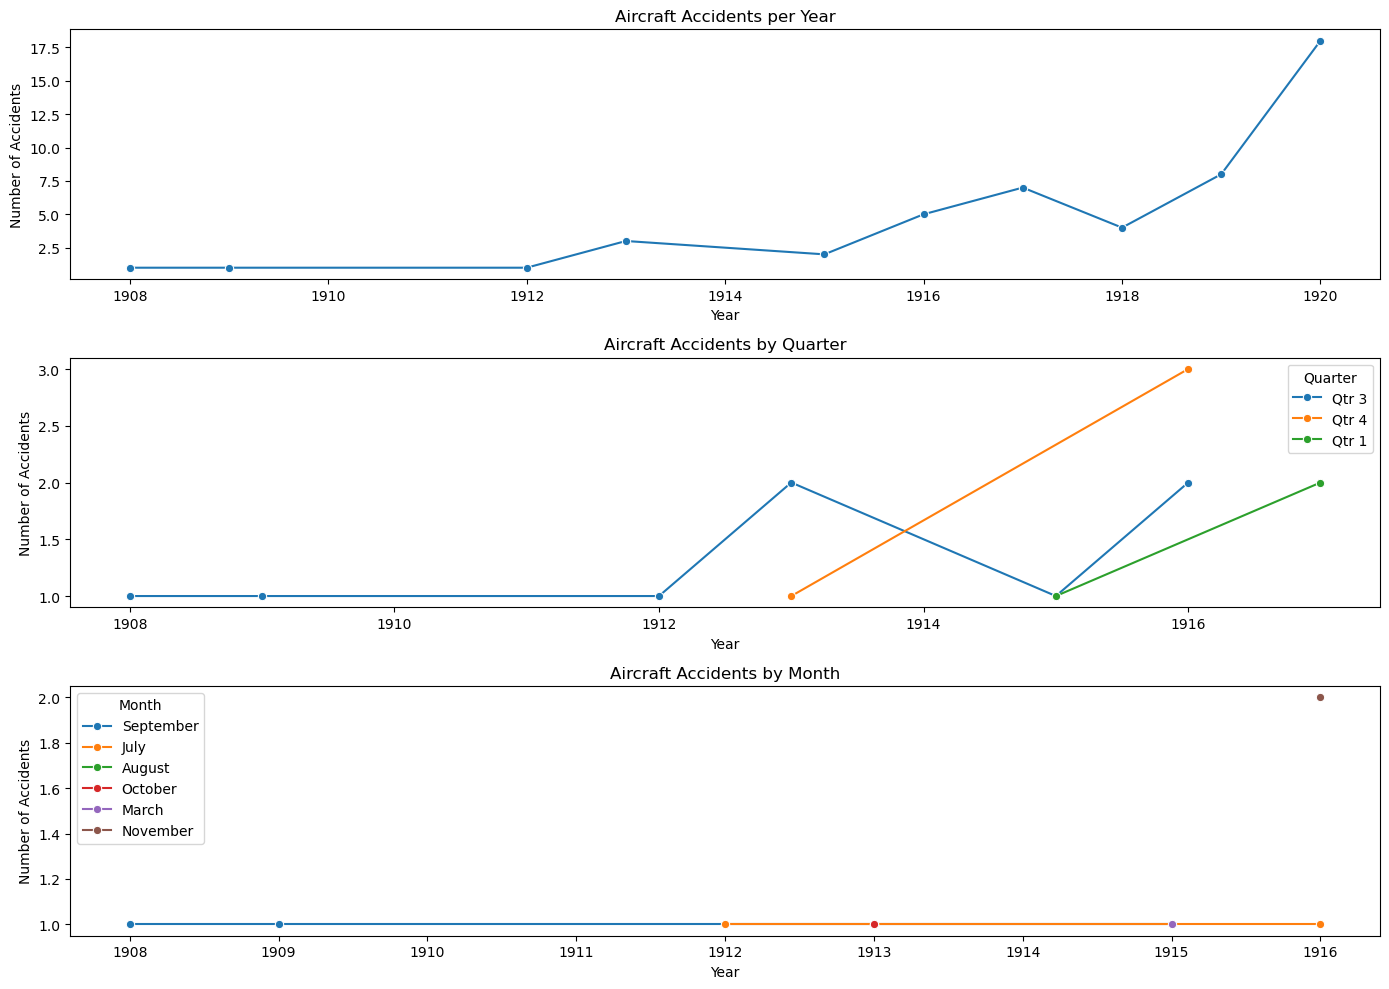

In [23]:

  
# Group accidents by Year
yearly_accidents = df.groupby('Year').size().head(10).reset_index(name='Accidents')

# Group accidents by Year & Quarter
quarterly_accidents = df.groupby(['Year', 'Quarter']).size().head(10).reset_index(name='Accidents')

# Group accidents by Year & Month
monthly_accidents = df.groupby(['Year', 'Month']).size().head(10).reset_index(name='Accidents')


# --- Visualization ---
plt.figure(figsize=(14, 10))

# Yearly trend
plt.subplot(3, 1, 1)
sns.lineplot(data=yearly_accidents, x='Year', y='Accidents', marker="o")
plt.title("Aircraft Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

# Quarterly trend
plt.subplot(3, 1, 2)
sns.lineplot(data=quarterly_accidents, x='Year', y='Accidents', hue='Quarter', marker="o")
plt.title("Aircraft Accidents by Quarter")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

# Monthly trend
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_accidents, x='Year', y='Accidents', hue='Month', marker="o", palette="tab10")
plt.title("Aircraft Accidents by Month")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

plt.tight_layout()
plt.show()

# Question 2
Which countries or regions record the highest frequency of aircraft accidents, and how do their fatality rates compare?

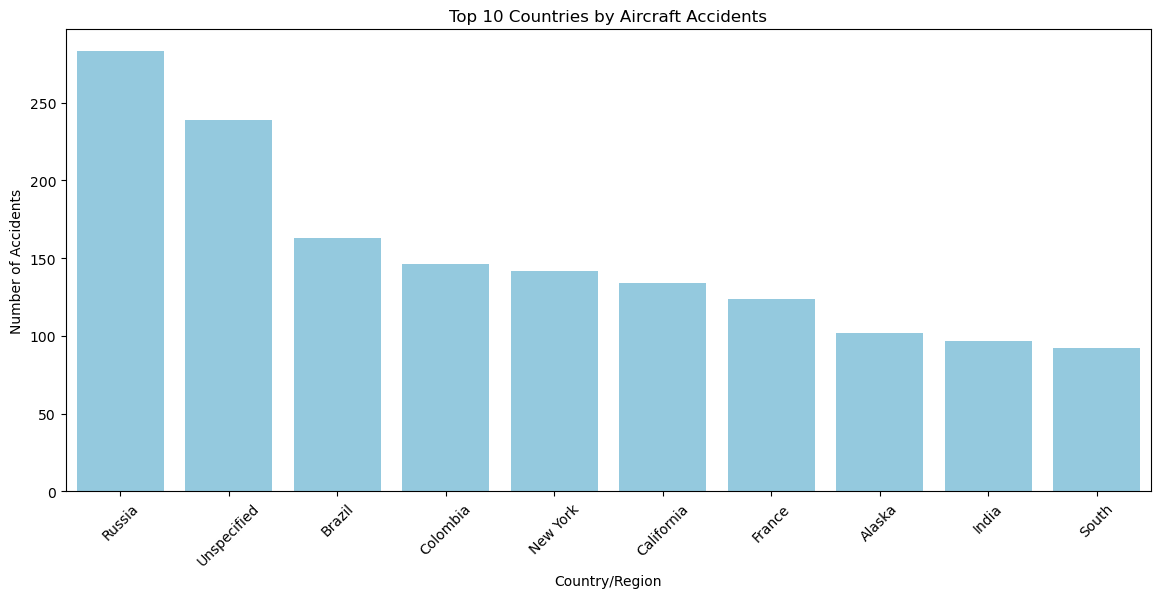

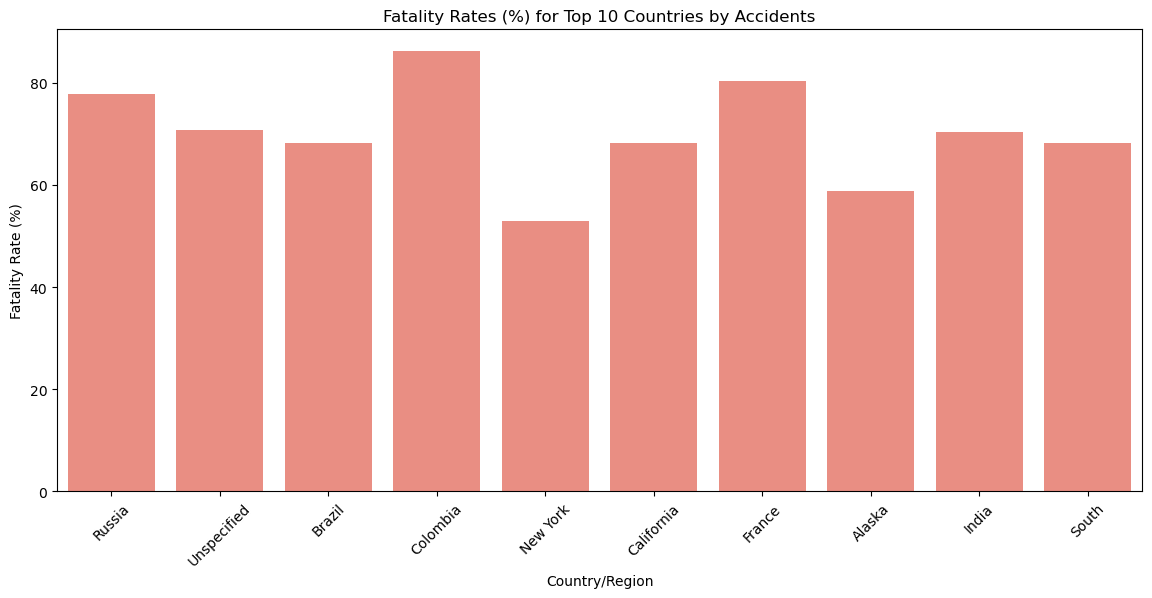

In [24]:
# --- Analysis ---
# Accident counts per country
country_accidents = df.groupby('Country/Region').size().reset_index(name='Accidents')

# Fatality rate = total fatalities / total aboard per country
country_fatalities = df.groupby('Country/Region').agg({
    'Fatalities_(air)': 'sum',
    'Aboard': 'sum'
}).reset_index()

country_fatalities['Fatality Rate (%)'] = (country_fatalities['Fatalities_(air)'] /
                                           country_fatalities['Aboard'] * 100).round(2)

# Merge accidents + fatality rates
country_stats = pd.merge(country_accidents, country_fatalities, on="Country/Region")

# Sort by accidents (top 10 countries)
top_countries = country_stats.sort_values(by="Accidents", ascending=False).head(10)

# --- Visualization ---
plt.figure(figsize=(14, 6))
sns.barplot(data=top_countries, x='Country/Region', y='Accidents', color='skyblue')
plt.title("Top 10 Countries by Aircraft Accidents")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.xlabel("Country/Region")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=top_countries, x='Country/Region', y='Fatality Rate (%)', color='salmon')
plt.title("Fatality Rates (%) for Top 10 Countries by Accidents")
plt.xticks(rotation=45)
plt.ylabel("Fatality Rate (%)")
plt.xlabel("Country/Region")
plt.show()

# Question 3
Top 10 Aircraft Manufacturers with Most Crashes

Top 10 Aircraft Manufacturers with Most Crashes:
    Aircraft_Manufacturer  Accidents
221               Douglas        992
107                Boeing        387
35                Antonov        284
361              Lockheed        211
603   de Havilland Canada        157
323              Ilyushin        138
409     McDonnell Douglas        132
264                Fokker        126
200               Curtiss        125
600          de Havilland        108


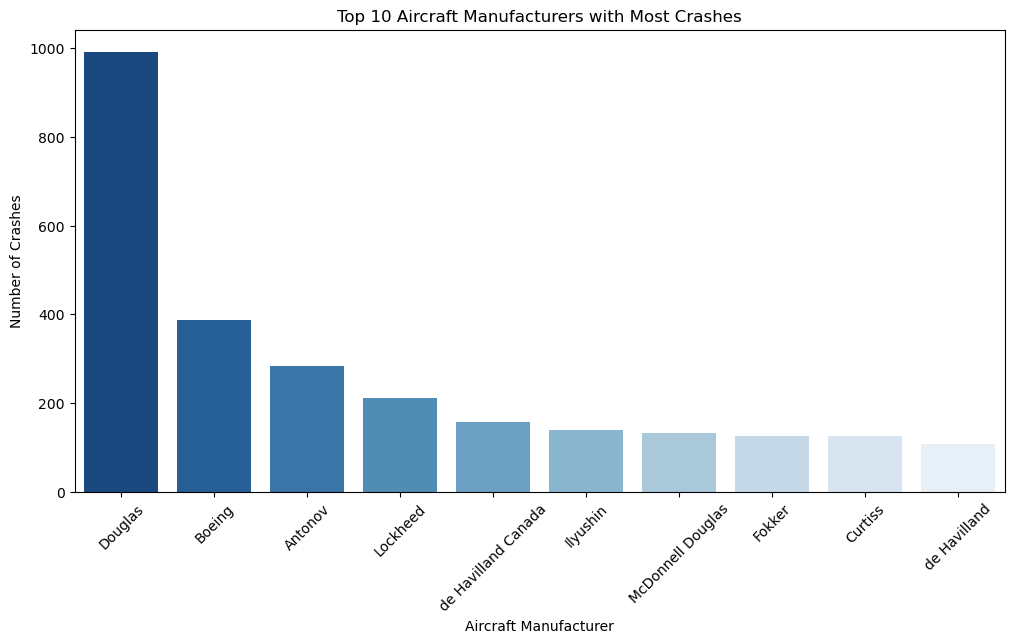

In [25]:
# --- Analysis ---
# Count accidents per manufacturer
top_manufacturers = (
    df.groupby('Aircraft_Manufacturer')
    .size()
    .reset_index(name='Accidents')
    .sort_values(by='Accidents', ascending=False)
    .head(10)
)

print("Top 10 Aircraft Manufacturers with Most Crashes:")
print(top_manufacturers)

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_manufacturers,
    x='Aircraft_Manufacturer',
    y='Accidents',
    hue='Aircraft_Manufacturer',
    palette='Blues_r',
    legend=False
)
plt.title("Top 10 Aircraft Manufacturers with Most Crashes")
plt.xticks(rotation=45)
plt.xlabel("Aircraft Manufacturer")
plt.ylabel("Number of Crashes")
plt.show()


# Question 4 
Aircrafts with the most fatalities

Top 10 Aircraft Models with Most Fatalities:
                     Aircraft  Fatalities_(air)
646              Boeing B 727              4219
649              Boeing B 737              3994
650              Boeing B 747              3767
642              Boeing B 707              2871
2726   McDonnell Douglas DC 9              1891
2719  McDonnell Douglas DC 10              1435
2720   McDonnell Douglas DC 8              1388
655              Boeing B 767               760
2170      Ilyushin IL 18BCCCP               693
3157        Tupolev TU 154MRA               660


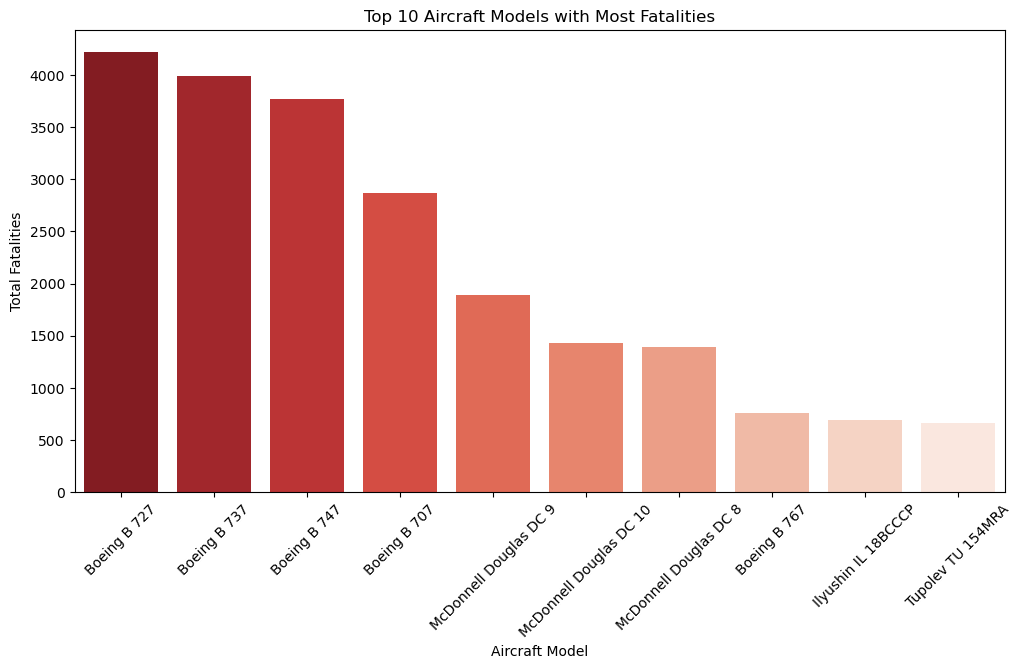

In [26]:
# --- Analysis ---
# Total fatalities per aircraft model
top_aircrafts = (
    df.groupby('Aircraft')
    ['Fatalities_(air)']
    .sum()
    .reset_index()
    .sort_values(by='Fatalities_(air)', ascending=False)
    .head(10)
)

print("Top 10 Aircraft Models with Most Fatalities:")
print(top_aircrafts)

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_aircrafts,
    x='Aircraft',
    y='Fatalities_(air)',
    hue='Aircraft',
    palette='Reds_r',
    legend=False
)
plt.title("Top 10 Aircraft Models with Most Fatalities")
plt.xticks(rotation=45)
plt.xlabel("Aircraft Model")
plt.ylabel("Total Fatalities")
plt.show()

# Question 5
Which years recorded the highest number of air crashes, and what are the top ten?

Top 10 Years with Most Air Crashes:
    Year  Crashes
35  1946       88
36  1947       82
78  1989       82
51  1962       79
37  1948       78
61  1972       77
34  1945       75
83  1994       74
40  1951       74
59  1970       73


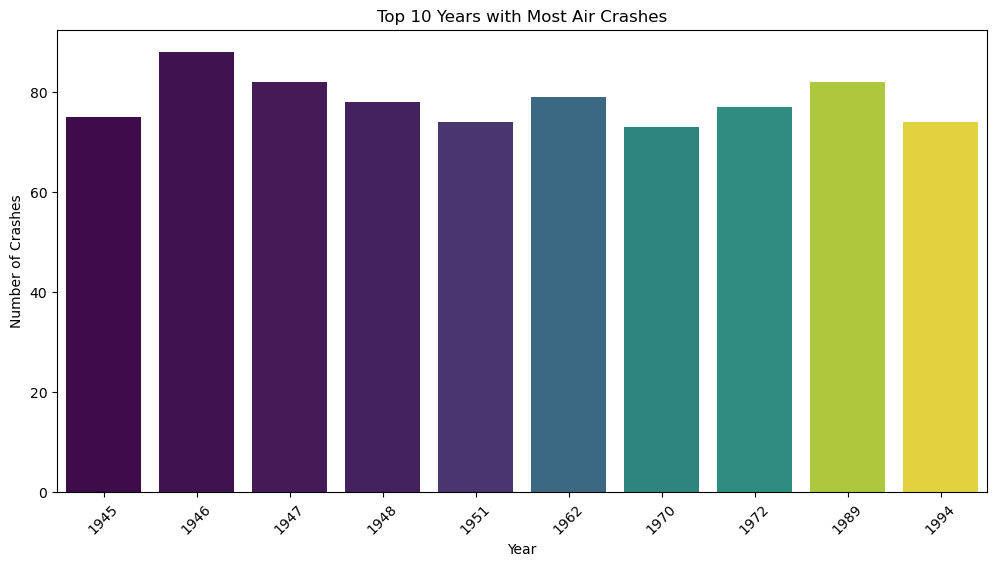

In [27]:
# --- Analysis ---
# Count crashes per year
top_years = (
    df.groupby('Year')
    .size()
    .reset_index(name='Crashes')
    .sort_values(by='Crashes', ascending=False)
    .head(10)
)

print("Top 10 Years with Most Air Crashes:")
print(top_years)

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_years,
    x='Year',
    y='Crashes',
    hue='Year',
    palette='viridis',
    legend=False
)
plt.title("Top 10 Years with Most Air Crashes")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()

# Question 6
How has the number of aircraft crashes changed over time per year? 

Crashes per year (sample):
Year
1908    1
1909    1
1912    1
1913    3
1915    2
Name: count, dtype: int64


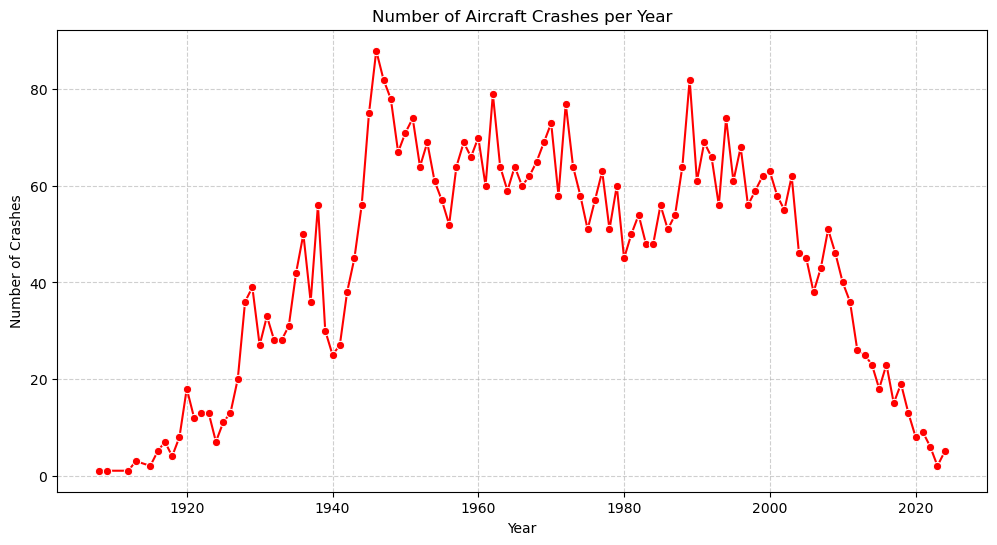

In [28]:
# Count crashes per year
crashes_per_year = df['Year'].value_counts().sort_index()

# Display first few years of crash counts
print("Crashes per year (sample):")
print(crashes_per_year.head())

# Plot yearly crash trend
plt.figure(figsize=(12,6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values, marker="o", color="red")
plt.title("Number of Aircraft Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Question 7
Top 10 countries with Fatalities

Top 10 countries with the most fatalities:
    Country/Region  Fatalities_(air)
369         Russia              9507
439    Unspecified              5048
77      California              3334
61          Brazil              2883
97        Colombia              2666
396          South              2452
149         France              2396
192          India              2363
195      Indonesia              2320
309       New York              2183


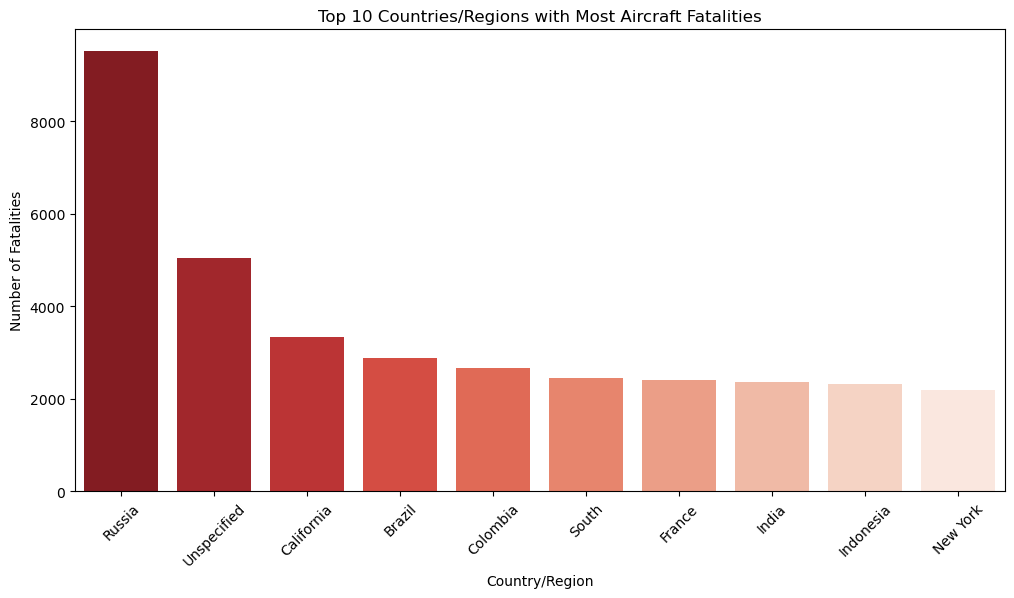

In [29]:
# Group by Country/Region and sum fatalities
fatalities_by_country = df.groupby('Country/Region')['Fatalities_(air)'].sum().reset_index()

# Sort by fatalities
fatalities_by_country = fatalities_by_country.sort_values(by='Fatalities_(air)', ascending=False)

# Display top 10 countries
print("Top 10 countries with the most fatalities:")
print(fatalities_by_country.head(10))

# Plot top 10 countries with fatalities
plt.figure(figsize=(12,6))
sns.barplot(
    data=fatalities_by_country.head(10),
    x='Country/Region',
    y='Fatalities_(air)',
    hue='Country/Region',
    palette='Reds_r',
    legend=False
)
plt.title("Top 10 Countries/Regions with Most Aircraft Fatalities")
plt.xlabel("Country/Region")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45)
plt.show()



# Question 8
 Which quarter of the year recorded the highest fatalities

Fatalities per Quarter:
  Quarter  Fatalities_(air)
2   Qtr 3             31491
3   Qtr 4             29804
0   Qtr 1             26766
1   Qtr 2             23738


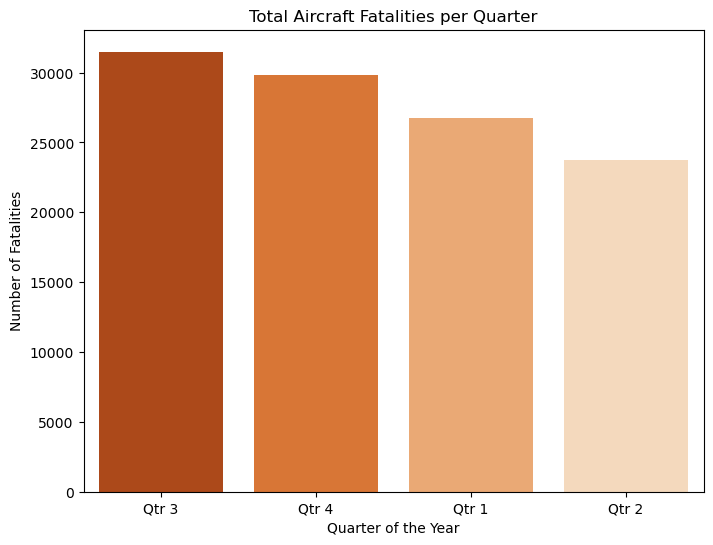

In [30]:
# Group by Quarter and sum fatalities
fatalities_by_quarter = df.groupby('Quarter')['Fatalities_(air)'].sum().reset_index()

# Sort values for clarity
fatalities_by_quarter = fatalities_by_quarter.sort_values(by='Fatalities_(air)', ascending=False)

# Display results
print("Fatalities per Quarter:")
print(fatalities_by_quarter)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=fatalities_by_quarter,
    x='Quarter',
    y='Fatalities_(air)',
    hue='Quarter',
    palette='Oranges_r',
    legend=False
)
plt.title("Total Aircraft Fatalities per Quarter")
plt.xlabel("Quarter of the Year")
plt.ylabel("Number of Fatalities")
plt.show()


# Question 9
Which aircraft had the highest average number  of people aboard ?

Top 10 Aircraft with Highest Average Number of People Aboard:
                            Aircraft  Aboard
652               Boeing B 747JA8966   517.0
98    Airbus A350-941/de Havilla DHC   385.0
2566          Lockheed C 5A Galaxy68   330.0
63                     Airbus A 340F   309.0
656                     Boeing B 777   307.0
62                      Airbus A 330   304.0
2405     Lockheed 1011 200 TriStarHZ   301.0
622                 Boeing 777 31HA6   300.0
621               Boeing 777 2H6ER9M   298.0
66                 Airbus A.330 301F   298.0


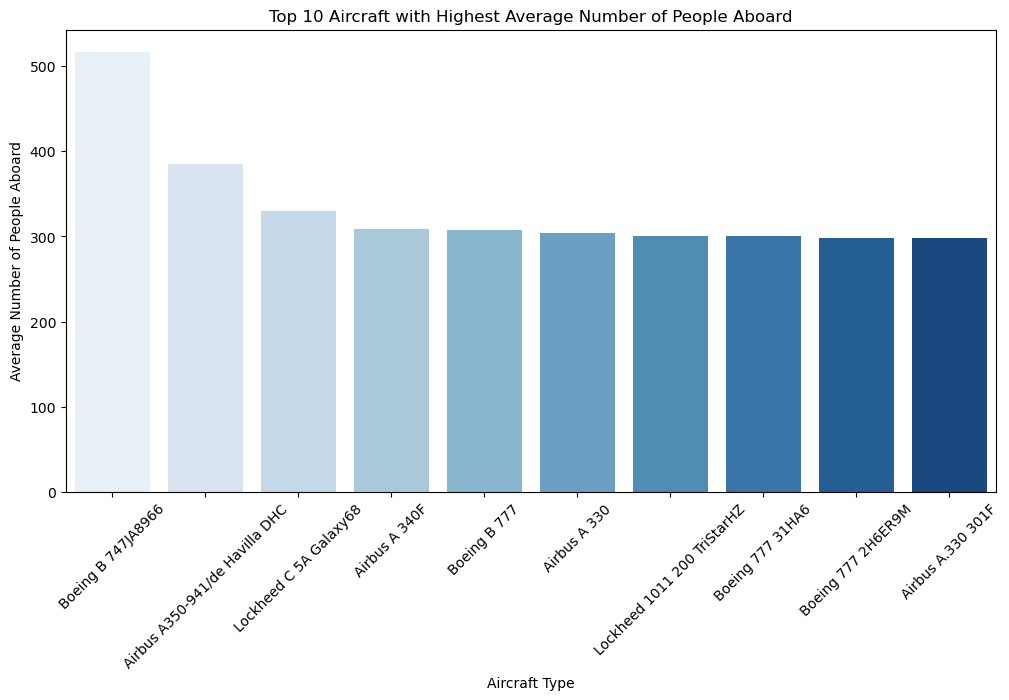

In [31]:
# Group by Aircraft and calculate average aboard
avg_aboard_per_aircraft = df.groupby('Aircraft')['Aboard'].mean().reset_index()

# Sort descending
avg_aboard_per_aircraft = avg_aboard_per_aircraft.sort_values(by='Aboard', ascending=False)

# Display top 10
print("Top 10 Aircraft with Highest Average Number of People Aboard:")
print(avg_aboard_per_aircraft.head(10))

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_aboard_per_aircraft.head(10),
    x='Aircraft',
    y='Aboard',
    hue='Aircraft',
    palette='Blues',
    legend=False
)
plt.title("Top 10 Aircraft with Highest Average Number of People Aboard")
plt.xlabel("Aircraft Type")
plt.ylabel("Average Number of People Aboard")
plt.xticks(rotation=45)
plt.show()


# Question 10
What proportion of crashes involved fatalities versus no fatalities?

Crash Outcomes (Fatal vs Non-Fatal):
        Crash_Type  Count
0      Fatal Crash   4940
1  Non-Fatal Crash     86


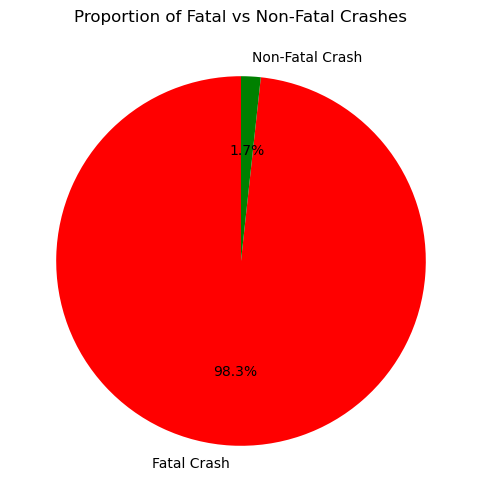

In [32]:
# Create Fatal vs Non-Fatal categories
df['Crash_Type'] = df['Fatalities_(air)'].apply(lambda x: 'Fatal Crash' if x > 0 else 'Non-Fatal Crash')

# Count crashes by type
crash_outcome = df['Crash_Type'].value_counts().reset_index()
crash_outcome.columns = ['Crash_Type', 'Count']

# Display results
print("Crash Outcomes (Fatal vs Non-Fatal):")
print(crash_outcome)

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    crash_outcome['Count'],
    labels=crash_outcome['Crash_Type'],
    autopct='%1.1f%%',
    colors=['red', 'green'],
    startangle=90
)
plt.title("Proportion of Fatal vs Non-Fatal Crashes")
plt.show()
